In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('Enter phystech e-mail\n') 
    seed = crc32(mail.strip().encode('utf-8'))%(2**32 - 1)
    rs = np.random.RandomState(seed)
    print('Your tasks are:')
    print(
        '1.{}, 2.{}, 3.{}, 4.{}, 5.{}, 6.{}'.format(
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=4), 
            rs.randint(low=1, high=3), 
            rs.randint(low=1, high=3)))
# yurchenko.aa@phystech.edu

Enter phystech e-mail
yurchenko.aa@phystech.edu
Your tasks are:
1.1, 2.3, 3.3, 4.2, 5.2, 6.1


### Задача 1.1
Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:
* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import jarque_bera, shapiro

In [3]:
data_normal = rs.randn(100)
lilliefors(data_normal)[1], jarque_bera(data_normal)[1], shapiro(data_normal)[1]

(0.17239555556983438, 0.13377401143526413, 0.018820391967892647)

### Задача 2.3
Известно, что электричка "Вашингтон-Петушки" аварийно останавливается раз в несколько дней. Аналитики РЖД проанализировали, сколько дней электричка едет без поломок, и составили выборку: $x = (3, 22, 13, 6, 18, 5, 6, 10, 7, 15)$.

РЖД хочет проверить гипотезу, что дисперсия распределения равна $9$ против правосторонней альтернативы.

Требуется:

Ввести предположение, каким распределением описывается данная выборка.
Записать задачу формально.
* Предложить критерий для оценки дисперсии распределения.
* Проверить гипотезу о значении дисперсии распределения для уровня значимости $\alpha = 0.05$ аналитически.
* Вывести и получить доверительный интервал для значения дисперсии при $\alpha = 0.05$.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для  подстановвки численых значений в финальную формулу)

### Задача 3.3
Предложить метод выбора наиболее важных признаков для логистической регрессии на основе изученных методов прикладной статистики. Осуществить выбор.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.datasets import load_wine

import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from statsmodels.stats.weightstats  import ttest_ind

In [2]:
wine = load_wine()

featute_cols = wine['feature_names']
X_wine = pd.DataFrame(wine['data'], columns =  featute_cols)
y_wine = wine['target']

df_wine = X_wine
df_wine['target'] = y_wine
df_wine.sample(10).sort_index()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,1
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0,1
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0,1
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


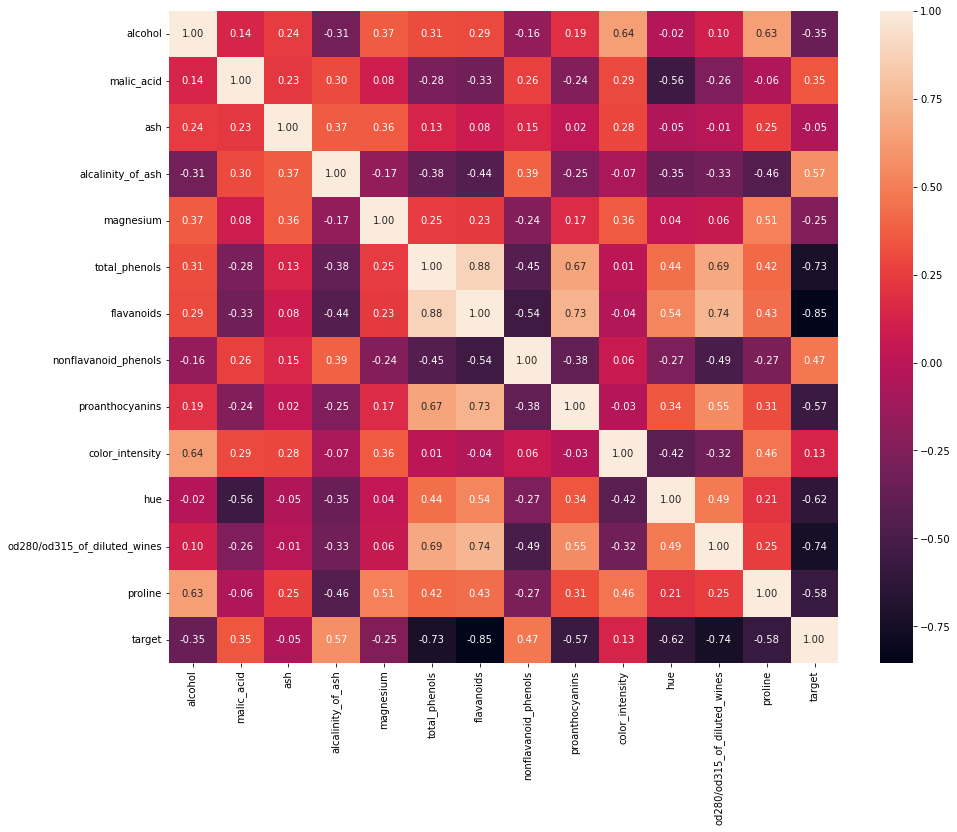

In [3]:
plt.figure(figsize = (15, 12))
_ = sns.heatmap(df_wine.corr(method = 'spearman'), annot=True, fmt = '.2f')

In [7]:
corr_matrix = df_wine.corr(method = 'spearman') \
                     .to_numpy(dtype = 'float64')

corr_matrix[:, -1]

array([-0.35416692,  0.34691327, -0.05398792,  0.56979214, -0.25049819,
       -0.72654365, -0.85490766,  0.47420549, -0.57064758,  0.13117017,
       -0.61657049, -0.7437869 , -0.57638313,  1.        ])

In [21]:
X = df_wine[featute_cols]
y = df_wine['target']

In [4]:
featute_cols

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
df_wine.shape

(178, 14)

In [15]:
lm = ols('target ~ C(proline) * C(proanthocyanins)', data=df_wine).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

ValueError: shapes (4,12221) and (178,) not aligned: 12221 (dim 1) != 178 (dim 0)

In [8]:
from sklearn.feature_selection import f_classif
X = df_wine[featute_cols]
y = df_wine['target']
f_classif(X, y)

(array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
         12.42958434,  93.73300962, 233.92587268,  27.57541715,
         30.27138317, 120.66401844, 101.31679539, 189.97232058,
        207.9203739 ]),
 array([3.31950380e-36, 4.12722880e-14, 4.14996797e-06, 9.44447294e-14,
        8.96339544e-06, 2.13767002e-28, 3.59858583e-50, 3.88804090e-11,
        5.12535874e-12, 1.16200802e-33, 5.91766222e-30, 1.39310496e-44,
        5.78316836e-47]))

In [9]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(score_func=f_classif, k=4)
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(178, 4)


In [10]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

,alcohol,flavanoids,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,3.06,5.64,3.92,1065.0
1,13.20,2.76,4.38,3.40,1050.0
2,13.16,3.24,5.68,3.17,1185.0
3,14.37,3.49,7.80,3.45,1480.0
4,13.24,2.69,4.32,2.93,735.0
...,...,...,...,...,...
173,13.71,0.61,7.70,1.74,740.0
174,13.40,0.75,7.30,1.56,750.0
175,13.27,0.69,10.20,1.56,835.0
176,13.17,0.68,9.30,1.62,840.0


In [11]:
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=2)
selector.fit(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

,flavanoids,proline
0,3.06,1065.0
1,2.76,1050.0
2,3.24,1185.0
3,3.49,1480.0
4,2.69,735.0
...,...,...
173,0.61,740.0
174,0.75,750.0
175,0.69,835.0
176,0.68,840.0


### Задача 4.2
Рассмотрим некоторую задачу классификации. Пусть задано качество 4 моделей $a_1, a_2, a_3, a_4$. Качество полученных моделей показано в таблице.

Исследователю требуется выбрать наилучшую модель. Для выбора лучшей модели исследовать требуется попарно сравнить среднее значение качества всех моделей. Может ли исследователь утверждать что какая-то из моделей лучше другой?

Требуется:

* записать задачу формально;
* предложить статистику для решения данной задачи;
* записать нулевое распределение данной статистики;
* записать явно правило принятия решения на основе статистики и нулевого распределения для обеспечения уровня значимости $\alpha = 0.05$;
* проверить гипотезу по записанному критерию, для данных из условия. Противоречат ли они гипотезе?

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

In [12]:
import pandas as pd
classifiers = pd.read_csv('classifiers.csv', sep = ',', index_col = 'Номер выборки')
classifiers

,a1,a2,a3,a4
Номер выборки,,,,
1,86,50,93,13
2,85,74,55,35
3,53,92,58,51
4,44,41,56,37
5,2,18,99,26
6,5,68,35,17


In [25]:
classifiers.describe()

,a1,a2,a3,a4
count,6.000000,6.000000,6.000000,6.000000
mean,45.833333,57.166667,66.000000,29.833333
std,36.853313,26.309061,24.754798,14.062954
min,2.000000,18.000000,35.000000,13.000000
25%,14.750000,43.250000,55.250000,19.250000
50%,48.500000,59.000000,57.000000,30.500000
75%,77.000000,72.500000,84.250000,36.500000
max,86.000000,92.000000,99.000000,51.000000


### Задача 5.2

Требуется:

* Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке
* Получить сумму zero-crossing по каждой из записей
* Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости $0.15$. Дискретность признака zero-crossing игнорировать.

In [13]:
import pandas as pd
speakers = pd.read_csv('speakers_all.csv')
speakers.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [19]:
speakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2172 non-null   float64
 1   age_onset        2172 non-null   float64
 2   birthplace       2168 non-null   object 
 3   filename         2172 non-null   object 
 4   native_language  2172 non-null   object 
 5   sex              2172 non-null   object 
 6   speakerid        2172 non-null   int64  
 7   country          2167 non-null   object 
 8   file_missing?    2172 non-null   bool   
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      1 non-null      object 
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 188.9+ KB


In [14]:
query_res = speakers[['speakerid', 'country']].groupby('country', as_index = False) \
                                              .count() \
                                              .query('speakerid >= 30') \
                                              .sort_values('speakerid', ascending = False) 

country_names = list(query_res.country)

In [15]:
speakers.query("country in @country_names")

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
9,73.0,5.0,"pepeekeo, hawai'i, usa",hawai'i,hawai'i,male,1675,usa,True,NaN,NaN,NaN
10,69.0,4.0,"pa'ia, hawai'i, usa",hawai'i,hawai'i,female,1676,usa,True,NaN,NaN,NaN
20,25.0,5.0,"jammu, kashmir, india",poonchi1,poonchi,male,425,india,True,NaN,NaN,NaN
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,NaN,NaN,NaN
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2157,23.0,10.0,"zhuzhou, hunan, china",xiang4,xiang,female,2163,china,False,NaN,NaN,NaN
2158,19.0,13.0,"yakutsk, russia",yakut1,yakut,female,1252,russia,False,NaN,NaN,NaN
2161,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada,False,NaN,NaN,NaN
2162,52.0,5.0,"brooklyn, new york, usa",yiddish3,yiddish,male,1161,usa,False,NaN,NaN,NaN


### Задача 6.1

Рассмотрим задачу предсказание числа заболевших некоторой болезнью от некоторых экологических анализов (см. файл). Гарантируется, что предсказание описывается линейной моделью.

Так как проведение анализов не является бесплатным, то стоит вопрос о том какие из анализов являются лишними (на уровне значимости $\alpha=0.05$) для предсказания линейной модели.

Требуется:

* Записать задачу формально;
* Провести отбор признаков линейной модели.

Все выкладки должны быть сделаны аналитически, без использования компьютера. (допускается использование компютера для подстановвки численых значений в финальную формулу)

In [16]:
import pandas as pd
sick = pd.read_csv('sick.csv')
sick

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,-0.5,-0.1,-1.2,-0.6,-1.1,1.4,-1.4,1.2,-0.2,-0.2,0.0
1,1.0,0.4,0.5,-1.1,0.6,-0.1,-0.2,-0.7,-0.5,0.4,1.0
2,0.3,-0.9,0.8,-0.3,-0.2,-1.4,0.4,1.6,1.0,-0.3,3.0
3,-1.1,-0.5,0.5,1.8,0.3,-0.3,-0.1,0.4,1.0,0.3,3.0
4,1.9,0.6,0.4,0.7,-2.9,0.5,-0.9,-1.5,0.9,-3.1,1.0
5,1.8,-0.9,0.9,1.0,0.2,0.3,-0.2,1.7,-1.5,0.2,2.0
6,-0.7,-0.5,1.5,0.2,1.0,-1.2,-0.1,0.1,0.3,-0.7,10.0
7,0.0,-0.8,1.1,0.1,1.0,1.3,0.7,1.0,0.2,1.5,4.0
8,-1.0,-0.4,-0.1,0.6,1.0,1.6,-0.4,-0.3,-0.3,0.8,1.0
9,2.4,2.0,2.0,0.6,1.3,0.3,2.2,2.3,0.7,2.0,5.0
